# **Intelligence Artificielle - TP initiation**

Ludivine Doridot

<div class="alert alert-block alert-info"> 
   
<em>   <b>Commencez par faire une copie de ce notebook, par sécurité (en faisant un clic droit + Duplicate). </b><br>
Rappel : Vous pouvez prendre des notes directement dans ce notebook, en ajoutant une cellule Markdown en cliquant sur l'icône <kbd>➕</kbd> dans la barre des menus, et en choisissant son format dans le menu déroulant. 
</em>
</div>

<mark>Si vous ajoutez des cellules avec vos commentaires, ou que vous modifiez des cellules existantes, **n'oubliez pas d'enregistrer votre notebook**.<mark>

Nous allons travailler sur des données disponibles publiquement en ligne pour explorer l'apprentissage automatique (machine learning). 
Les données correspondent à des mesures sur des images cytologiques obtenues à partir d'une aspiration avec une aiguille fine à partir de masses détectées dans le sein de patientes. La but est donc de prédire si ces masses sont bénignes ou malignes (ie cancers du sein). 

Exemple d'images utilisées : 

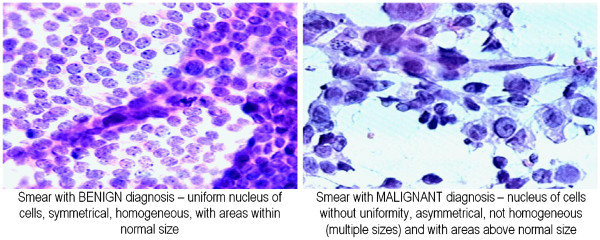

Un système automatisé d'analyse d'images a permis d'extraire des paramêtres numériques et ce sont ceux ci que nous allons utilisés. 

Vous aurez au cours de ce TP 3 questions (cadre orange) pour lesquelles les réponses sont attendues sur moodle (Quiz intro IA) et qui serviront dans le cadre de votre évaluation pour cet UE3 (contrôle continu). 


**Plan du TP :**

**I. Load Data**  
**II. Explore Data**  
**III. Decision Tree**  
**IV. Random Forest**

**Conclusion**



## I - Load Data

Nous allons tout d'abord charger les données sous forme d'un tableau (les titres des colonnes sont dans un fichier séparé). 

In [ ]:
# 1- Load necessary tools and set up workink directory
setwd("~/pass_minrs_ue3/ai/")
library(ggplot2)
library(tidyr)
library(caret)
library(corrplot)
library(dplyr)
library(rpart)
library(rpart.plot)
sessionInfo()

- On charge à présent dans R les données `DataBreastCancerWisconsin.csv` depuis le repetoire `./data_BreastCancer` avec la fonction `read.table()`.

In [ ]:
# 2- Load data (csv and txt files) into dataframes called breastCancerData and breastCancerDataColNames with read.table()
breastCancerData <- read.table(XXX)
breastCancerDataColNames <- read.table(XXX)

- On visualise la structure et les premières lignes avec les fonctions `str()` et ` head()`.

In [ ]:
# 3- Visualiser la structure et les premières lignes de vos données


In [ ]:
# 4- Visualiser les noms de colonnes


- Comme vous pouvez le constater, les noms des colonnes ne sont pas explicites. Nous les récupérons à présent à partir du fichier `NamesBreastCancerWisconsin.txt` également présent dans le même répertoire `./data_BreastCancer`.

- et nous ajoutons ces noms de colonnes à l'objet  `breastCancerData` avec la fonction `names()` ou `colnames()`.

In [ ]:
# 5- Ajouter le nom des colonnes à votre dataframe breastCancerData


In [ ]:
# 6- Quelles sont les dimensions de votre dataframe breastCancerData ?


- Combien avez vous de patientes avec un diagnostic "B" (benin) ? et de patientes avec un diagnostic de tumeur maligne "M" ?

Pour calculer ces comptes, vous pouvez utiliser différentes fonctions : `table()`, `sum()`, `subset()`, `nrow()`, `length()`, ...

In [ ]:
# 7- Combien avez vous de patientes avec un diagnostic "B" (benin) ?


In [ ]:
# 8- Combien avez vous de patientes avec un diagnostic de tumeur maligne "M" ?


<div class="alert alert-warning"> 
    --> 1er quizz : quel est le nombre de patientes avec une tumeur maligne ?
</div>

In [ ]:
# 9- Faites du diagnostic un facteur


In [ ]:
# 10- Mettez le numéro d'identification des patientes en rownames et retirez la colonne correspondante du tableau
#Attention, si vous faites tourner plusieurs fois ce bloc, vous risquez de supprimer plusieurs colonnes 


In [ ]:
# 11- Vérifier la dimension de la table et visualiser les premières lignes de vos données
# si les dimensions ne sont pas 569 x 31 --> faites signe à un enseignant


## II - Explorer les données

Nous allons maintenant regarder les données d'un peu plus près pour nous familiariser avec elles et potentiellement décider lesquelles sont les plus pertinentes. 

In [ ]:
# 12- Explorer les données avec summary()


In [ ]:
# 13- Faire un boxplot avec le paramêtre Radius.Mean pour comparer les B et les M 
#(remplacer les XXX et co par les éléments nécessaires)
ggplot(XXX,
       aes(Diagnosis, YYY, color = Diagnosis)) +
geom_XXX()

In [ ]:
# 14- Visualiser plusieurs boxplot d'un coup (les colonnes avec des moyennes "mean")
options(repr.plot.width = 10, repr.plot.height = 10)
gather(XXX, x, y, YYY:ZZZ) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_WWW() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

In [ ]:
# 15- Visualiser plusieurs boxplot d'un coup (les colonnes avec des ecarts types "SE")


In [ ]:
# 16- Visualiser plusieurs boxplot d'un coup (les colonnes avec pires valeurs "Worst")


In [ ]:
# 17- Center & scale data
ppv <- preProcess(breastCancerData,
                  method = c("center", "scale"))
breastCancerData_tr <- predict(ppv, breastCancerData)

In [ ]:
# 18- Summarize first 5 columns of the original data using summary()


In [ ]:
# 19- Summarize first 5 columns of the re-centered and scaled data


In [ ]:
# 20- Visualiser à nouveau plusieurs boxplot d'un coup à partir des données centrées


In [ ]:
# 21- vérifier si les variables sont fortement corrélées entre elles
options(repr.plot.width = 10, repr.plot.height = 10)
# calculate correlation matrix avec cor() 

# calculate correlation matrix avec corrplot() 

# calculate correlation matrix avec corrplot() et l'option order hclust


In [ ]:
# 22- Faire des tests statistiques pour voir les paramêtres les plus prometteurs
# exemple pour la colonne Radius.Mean
t.test(Radius.Mean ~ Diagnosis, data = breastCancerData)$p.value
# stocker les p-val pour chacun des 30 paramêtres dans une variable nommée ttests (utiliser la fonction lapply)


## III - Decision Tree

In [ ]:
# 23- split into training and test subsets
set.seed(1000)
ind <- sample(2, nrow(breastCancerData),
              replace=TRUE,
              prob=c(0.7, 0.3))

breastCancerData.train <- subset(breastCancerData, ind == 1)
breastCancerData.test <- subset(breastCancerData, ind == 2)

In [ ]:
# 24- vérifier que les 2 sets sont comparables
bind_rows(data.frame(group = "train", breastCancerData.train),
      data.frame(group = "test", breastCancerData.test)) %>%
  gather(x, y, XXX:YYY) %>%
  ggplot(aes(x = y, color = group)) +
    geom_WWW() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

In [1]:
# 25- Construire un modèle avec 3 paramètres
myFormula <- Diagnosis ~ Radius.Mean + Texture.Mean + Perimeter.Mean

breastCancerData.model <- rpart(myFormula,
                                method = "class",
                                data = breastCancerData.train,
                                minsplit = 10,
                                minbucket = 1,
                                maxdepth = 3,
                                cp = -1)

#The parameters that we used reflect the following aspects of the model:
#    minsplit: the minimum number of instances in a node so that it is split
#    minbucket: the minimum allowed number of instances in each leaf of the tree
#    maxdepth: the maximum depth of the tree
#    cp: parameter that controls the complexity for a split and is set intuitively 
#        (the larger its value, the more probable to apply pruning to the tree)

print(breastCancerData.model$cptable)
rpart.plot(breastCancerData.model)
table(predict(breastCancerData.model, type="class"),
      breastCancerData.train$Diagnosis)


ERROR: Error in rpart(myFormula, method = "class", data = breastCancerData.train, : could not find function "rpart"


<div class="alert alert-warning"> 
    2ème quizz : combien y a-t-il d'erreurs (faux positifs + faux négatifs) avec ce modèle sur le dataset d'entrainement (training set) ? 
</div>

In [ ]:
# 26- simplifier ce modèle en modifiant le cp (prendre le cp otimal = min with xerror)
opt <- which.min(XXX[, YYY])
opt
cp <- breastCancerData.model$cptable[opt, "CP"]
# prune tree
breastCancerData.pruned.model <- prune(breastCancerData.model, cp = cp)
# plot tree
rpart.plot(breastCancerData.pruned.model)

table(predict(breastCancerData.pruned.model, type="class"),
      breastCancerData.train$Diagnosis)

In [ ]:
# 27- Test the model (initial and pruned) on test set
## make prediction
BreastCancer_pred <- predict(breastCancerData.model,
                             newdata = breastCancerData.test,
                             type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)
plot(BreastCancer_pred ~ Diagnosis, data = breastCancerData.test,
     xlab = "Observed",
     ylab = "Prediction")

BreastCancer_pred <- predict(breastCancerData.pruned.model,
                             newdata = breastCancerData.test,
                             type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)
plot(BreastCancer_pred ~ Diagnosis, data = breastCancerData.test,
     xlab = "Observed",
     ylab = "Prediction")

In [ ]:
# 28- Construire un nouveau modèle avec 3 mêmes paramètres (Radius.Mean, Texture.Mean, Perimeter.Mean) mais avec minsplit=15, minbucket=2 et maxdepth=5

#simplifier ce modèle

# Le tester sur le set test 


In [ ]:
# 29- Recommencer avec minsplit=5, minbucket=1 et maxdepth=2

#simplifier ce modèle

# Le tester sur le set test 

In [ ]:
# 30- Construire un modèle avec 3 autres paramètres (Radius.Mean, Concavity.Mean, Perimeter.Worst)
# with minsplit = 10, minbucket = 1, maxdepth = 3

#simplifier ce modèle

# Le tester sur le set test 


In [ ]:
# 31- Construire un modèle avec 4 autres paramètres (Radius.Mean, Concavity.Mean, Perimeter.Worst, Compactness.Worst)
# with minsplit = 10, minbucket = 1, maxdepth = 3

#simplifier ce modèle

# Le tester sur le set test 


<div class="alert alert-warning"> 
    3ème quizz : est-ce que le modèle avec les 3 paramètres (Radius.Mean, Concavity.Mean et Perimeter.Worst) est plus performant (ie donne moins d'erreurs) sur le set test que le modèle avec 4 paramêtres (Radius.Mean, Concavity.Mean, Perimeter.Worst, Compactness.Worst) ? 
</div>

## IV - Random Forest

<div class="alert alert-block alert-danger">
    <b>Attention:</b> 
    La commande suivante peut prendre un peu de temps (environ 1 minute) de calcul. Patience patience ...
</div>

In [ ]:
# 32- Create a random forest model on the training dataset

model_rf <- caret::train(Diagnosis ~ .,
                         data = XXX,
                         method = "rf",
                         preProcess = c("scale", "center"),
                         trControl = trainControl(method = "repeatedcv", 
                                                  number = 5, 
                                                  repeats = 3, 
                                                  verboseIter = FALSE))

model_rf
model_rf$finalModel$confusion

In [ ]:
# 33- plot parameters importance
imp <- model_rf$finalModel$importance
imp[order(imp, decreasing = TRUE), ]

# estimate variable importance
importance <- varImp(model_rf, scale = TRUE)
plot(importance)

In [ ]:
# 34- predicting test data
confusionMatrix(predict(model_rf, XXX),
                breastCancerData.test$Diagnosis)

<div class="alert alert-warning"> 
    4ème (et dernier) quiz : est-ce que le modèle utilisant random forest est plus performant que le premier modèle de Decision tree (celui avec les 3 paramêtres Radius.Mean + Texture.Mean + Perimeter.Mean) sur le set test ? 
</div>

***
***
## Useful commands
<div class="alert alert-block alert-info"> 
    
- <kbd>CTRL</kbd>+<kbd>S</kbd> : save notebook<br>    
- <kbd>CTRL</kbd>+<kbd>ENTER</kbd> : Run Cell<br>  
- <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> : Run Cell and Select Next<br>   
- <kbd>ALT</kbd>+<kbd>ENTER</kbd> : Run Cell and Insert Below<br>   
- <kbd>ESC</kbd>+<kbd>y</kbd> : Change to *Code* Cell Type<br>  
- <kbd>ESC</kbd>+<kbd>m</kbd> : Change to *Markdown* Cell Type<br> 
- <kbd>ESC</kbd>+<kbd>r</kbd> : Change to *Raw* Cell Type<br>    
- <kbd>ESC</kbd>+<kbd>a</kbd> : Create Cell Above<br> 
- <kbd>ESC</kbd>+<kbd>b</kbd> : Create Cell Below<br> 

<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>   
</em>    
 
</div>

*[revision on 11/04/2023 by @CVandiedonck]*

*[revision on 19/07/2023 by @LDoridot*

*[revision on 23/04/2024 by @LDoridot*